# Moringa School Week 8 Independent Project 

# Defining the Question

**1. Specifying the Question**

Use the healthcare datasets provided to accomplish the following:  
 Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

 **Part 1: Decision trees:**
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

**Part 2: SVM:**
- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

**2. Defining the metric for success**

f_1 score and accuracy will be the two many attributes that we shall use to check on the accuracy of the models we shall develop. 

**3. Understanding the context**

This project is being done on behalf of the Nairobi Hospital; the hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. We are expected to use the healthcare datasets provided to develop answers to the questions asked. 

**4. Recording the experimental design**

*   Data reading and checking
*   Data tidying 
*   Data Exploration
*   Implementing the solution 
*   Modelling 
*   Challenging the solution
*   Follow Up question
*   Conclusion

**5. Data Relevance**

The data provided has the relevant features needed to carry out the project. 

# Reading the Data

In [ ]:
#Importing Libraries 
#

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, confusion_matrix, mean_absolute_error, accuracy_score, f1_score

In [ ]:
df_h = pd.read_csv('hypothyroid.csv')
df_h.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


# Checking the Data

In [ ]:
#Previewing the top of our dataset 
#

df_h.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
#Previewing the bottom of our dataset 
#

df_h.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
#Checking the shape of the data
#

df_h.shape

(3163, 26)

In [ ]:
#Checking on the data type 
#

df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

# External Data Source Validation

The dataset provided was validated by a valid external source.

# Tidying the Dataset

In [ ]:
#Checking for missing values 
#

df_h.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [ ]:
#Checking for duplicates 
#

df_h.duplicated().sum()

77

In [ ]:
#Dropping duplicates 
#
df_h.drop_duplicates(keep='first', inplace = True)

#Checking if the duplicated values have actually been dropped
df_h.duplicated().sum()

0

In [ ]:
#Checking for unique values 
#

df_h.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [ ]:
for column in df_h.columns:
  print(column)
  print("This column has", df_h[column].nunique(), "unique values, they are shown below:\n")
  print(df_h[column].unique())
  print('________________________________________________________________________________________________\n')
 

status
This column has 2 unique values, they are shown below:

['hypothyroid' 'negative']
________________________________________________________________________________________________

age
This column has 93 unique values, they are shown below:

['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
________________________________________________________________________________________________

sex
This column has 3 unique values, they are shown below:

['M' 'F' '?']
________________________________________________________________________________________________

on_thyroxine
Thi

Our dataset seems to have a good number of '?', hence the numerous unique values. We will remendy this by converting them to unique values and acting on the accordingly. 

In [ ]:
#Replacing all the ? with nan 

df_h.replace('?',np.nan,inplace=True)

In [ ]:
#checking for missing values once again
#

df_h.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

Since we have a high number of missing values, we have decided to replace the missing values with the mode of each specific column. Since most of your data points are categorical, i do not believe using the mean will be ideal.

In [ ]:
#Replacing missing values will the mode 
#
df_h['sex'] = df_h['sex'].fillna(df_h['sex'].mode()[0])
df_h['age'] = df_h['age'].fillna(df_h['age'].mode()[0])
df_h['TSH'] = df_h['TSH'].fillna(df_h['TSH'].mode()[0])
df_h['T3'] = df_h['T3'].fillna(df_h['T3'].mode()[0])
df_h['TT4'] = df_h['TT4'].fillna(df_h['TT4'].mode()[0])
df_h['FTI'] = df_h['FTI'].fillna(df_h['FTI'].mode()[0])
df_h['TBG'] = df_h['TBG'].fillna(df_h['TBG'].mode()[0])                                
df_h['T4U'] = df_h['T4U'].fillna(df_h['T4U'].mode()[0]) 

In [ ]:
#checking to see if the '?' have been replaced  
#

df_h['sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df_h.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

The '?' is no longer present in both the sex and TSH column, we can assume it is no longer present in all columns. We can also see that the dataset also contains no missing values. 

In [ ]:
#Converting relevant columns from object to float 
df_h[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI','TBG']] = df_h[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI','TBG']].astype(float)

In [ ]:
# Converting to categorical data
df_h[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]] = df_h[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]].astype('category')

In [ ]:
#Checking to see if the data type has been converted 
#

df_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3086 non-null   category
 1   age                        3086 non-null   float64 
 2   sex                        3086 non-null   category
 3   on_thyroxine               3086 non-null   category
 4   query_on_thyroxine         3086 non-null   category
 5   on_antithyroid_medication  3086 non-null   category
 6   thyroid_surgery            3086 non-null   category
 7   query_hypothyroid          3086 non-null   category
 8   query_hyperthyroid         3086 non-null   category
 9   pregnant                   3086 non-null   category
 10  sick                       3086 non-null   category
 11  tumor                      3086 non-null   category
 12  lithium                    3086 non-null   category
 13  goitre                     3086 n

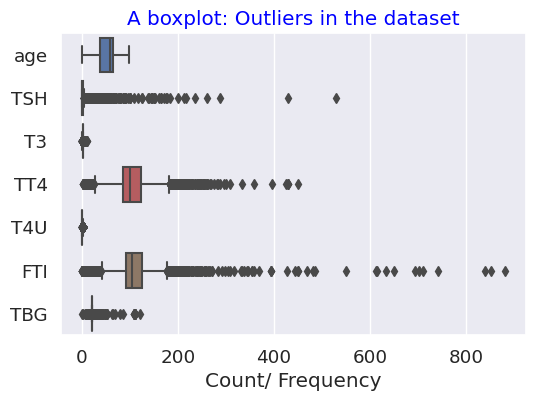

In [ ]:
# check for outliers for the
colm = df_h[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI','TBG']]

plt.figure(dpi = 100)
ax = sns.boxplot(data = colm , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

# Exploratory Analysis

The purpose of this stage is to understand our dependent and independent variables, identify the relationships between them abd the relevance of different features. 

In [ ]:
#Previewing the columns we have 

df_h.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

**Univariate Analysis**

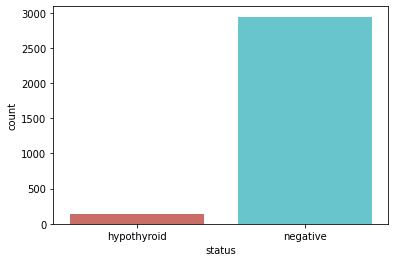

In [ ]:
#Visualizing the amount of people who tested positive for hypothyroid vs those who tested negative

sb.countplot(x='status',data=df_h, palette='hls')

The number of negative cases were way more than the positive cases.

**Bivariate Analysis**

In [ ]:
#Checking on the correlation between various variables 
#

correlation = df_h.corr()
correlation

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,0.011063,-0.231530,-0.078763,-0.205466,0.048493,-0.098893
TSH,0.011063,1.000000,-0.160404,-0.304534,0.072900,-0.236456,-0.027072
T3,-0.231530,-0.160404,1.000000,0.521125,0.377996,0.276379,-0.019873
TT4,-0.078763,-0.304534,0.521125,1.000000,0.319429,0.679095,-0.003273
T4U,-0.205466,0.072900,0.377996,0.319429,1.000000,-0.293725,0.028359
FTI,0.048493,-0.236456,0.276379,0.679095,-0.293725,1.000000,-0.035055
TBG,-0.098893,-0.027072,-0.019873,-0.003273,0.028359,-0.035055,1.000000


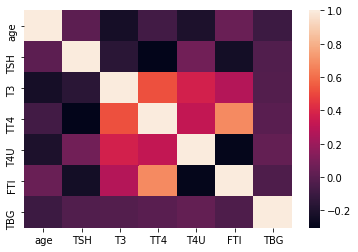

In [ ]:
#Visualizing the correlation 
sb.heatmap(df_h.corr())

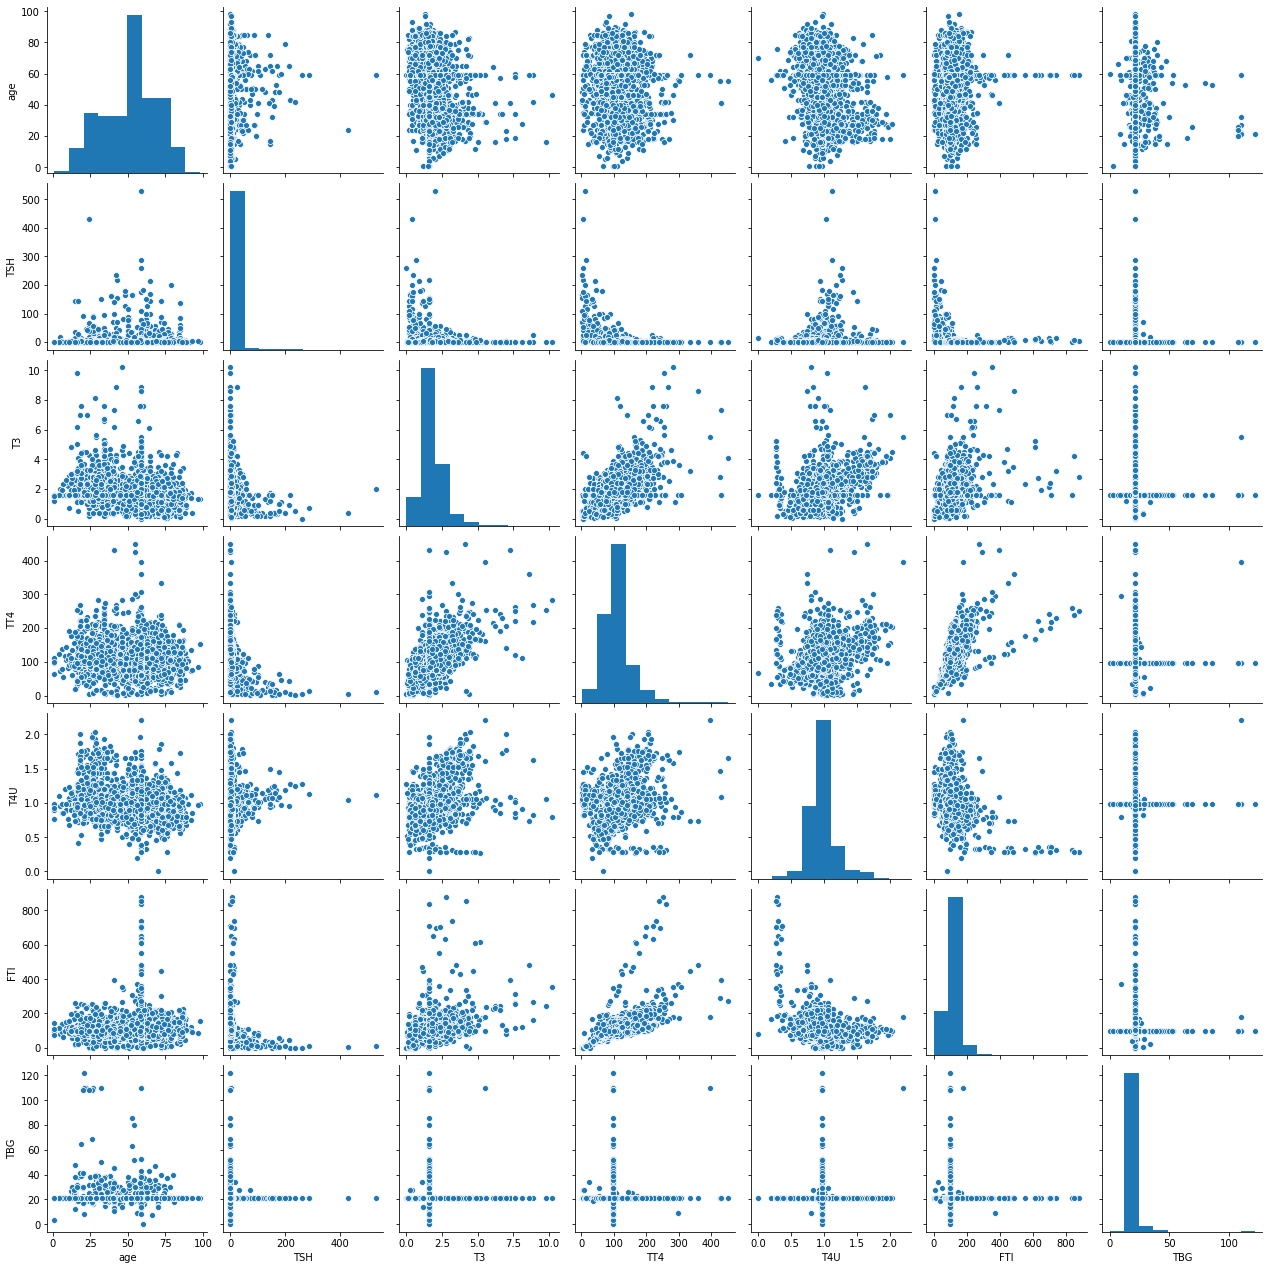

In [ ]:
sns.pairplot(df_h)
plt.show()

# Implementing the Solution

## Decision Trees

*   Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid
*   use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.

**Model 1 - Random forests**

Feature Engineering

In [ ]:
#categorical 
categorical  = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']

#boolean values
boolean = ['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre']
for column in boolean:
  df_h[column] = np.where(df_h[column] == 'False', 1, 0)

for column in categorical:
  df_h[column] = np.where(df_h[column] == 'y', 1, 0)

df_h['sex'] = np.where(df_h['sex'] == 'M', 1, 0)

In [ ]:
df_h.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,n,21.0
1,hypothyroid,15.0,0,0,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,n,21.0
2,hypothyroid,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,n,21.0
3,hypothyroid,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,n,21.0
4,hypothyroid,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,n,21.0


In [ ]:
test_features = df_h[['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','age','TSH','T3','TT4','T4U','FTI']]

X = test_features
y = df_h['status']

#Training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

#Predicting
y_pred = forest.predict(X_test)

In [ ]:
#Assessing the model's performance
#
print('The accuracy score is:', accuracy_score(y_test, y_pred))


The accuracy score is: 0.9892008639308856


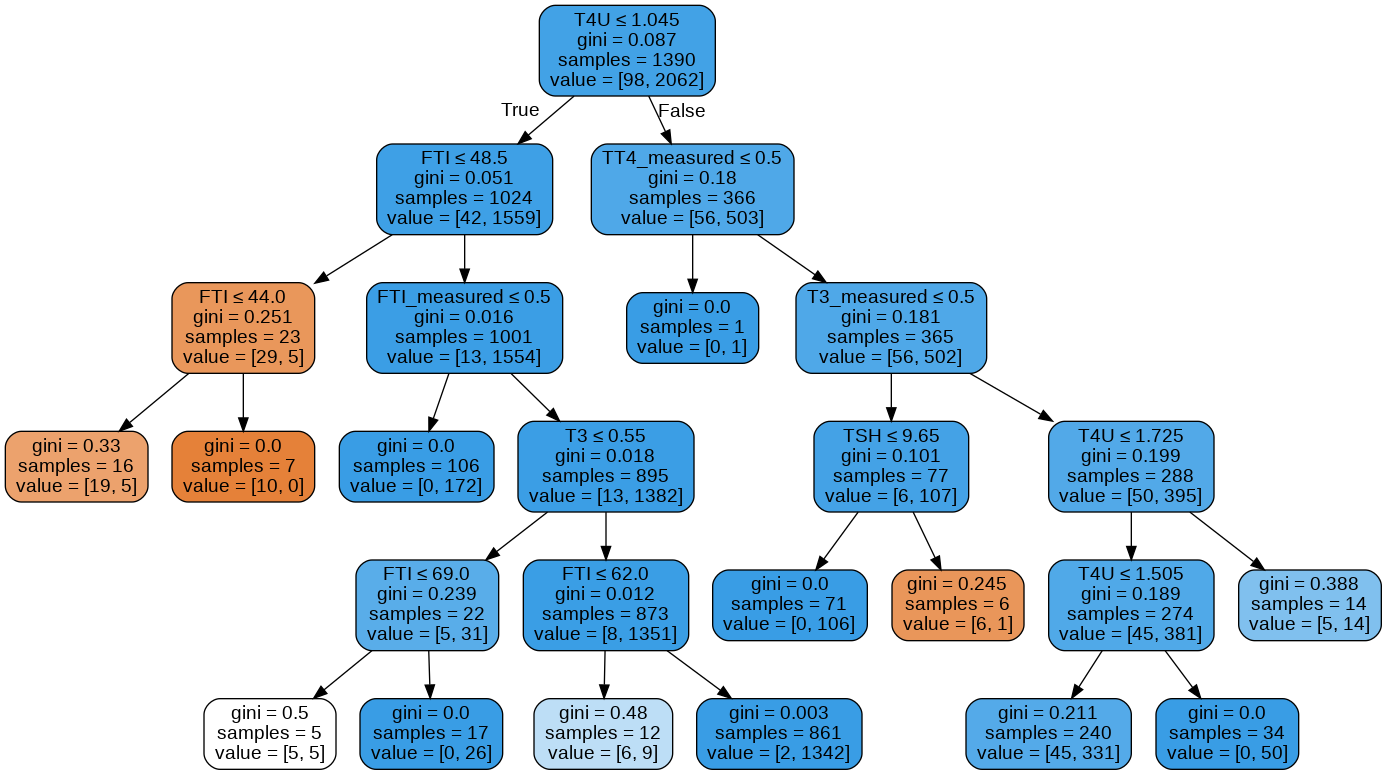

In [ ]:
#Checking what tree number 5 looks like

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[5]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

print(feature_importances) 
print()

#We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('T3_measured', 0.01), ('TT4_measured', 0.0), ('T4U_measured', 0.0), ('FTI_measured', 0.0), ('age', 0.0), ('TSH', 0.13), ('T3', 0.02), ('TT4', 0.0), ('T4U', 0.09), ('FTI', 0.76)]

Variable: FTI                  Importance: 0.76
Variable: TSH                  Importance: 0.13
Variable: T4U                  Importance: 0.09
Variable: T3                   Importance: 0.02
Variable: T3_measured          Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0

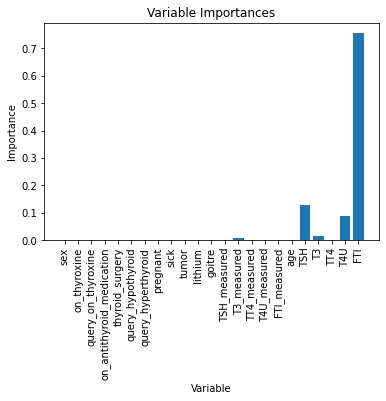

In [ ]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**Model 2 - Ada boosted trees**

In [ ]:
#**
#

test_features = df_h[['FTI']]

X = test_features
y = df_h['status']

# Train data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
 ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),n_estimators=300, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)


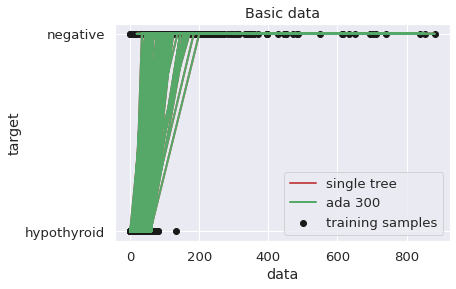

In [ ]:

# 
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_ada, c="r", label="single tree", linewidth=2)
plt.plot(X, y_pred_ada, c="g", label="ada 300", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_predict))

Accuracy: 0.9881209503239741


In [ ]:
conf_matrix = confusion_matrix(y_test,y_predict)
conf_matrix

array([[ 32,   7],
       [  4, 883]])

## SVM

*   Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid
*   Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

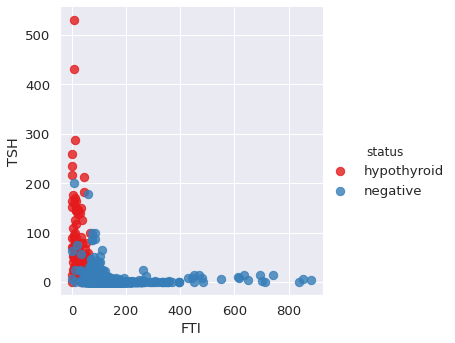

In [ ]:
#Polynomial ernel
#Linear ernel
#rbf kernel

# Plotting our desired features
sns.lmplot('FTI','TSH', data=df_h, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

**Linear kernel**

In [ ]:
#Linear kernel
#

# Specify the input for the model
LinearM = df_h[['FTI','TSH']].to_numpy()

# Fit the model
model = SVC(kernel= 'linear')
clf_model = model.fit(LinearM ,type_label)

**Polynomial kernel**

In [ ]:
#Polynomial kernel

test_features = df_h[['FTI','TSH']]

X = test_features
y = df_h['status']

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9838187702265372
[[ 18   7]
 [  3 590]]


**rbf kernel**

In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9854368932038835
[[ 18   7]
 [  2 591]]


# Challenging the Solution

#Decision Trees
Accuracy score is: 0.9892008639308856 - This is fairly good score

#Ada boosted trees
Accuracy: 0.9881209503239741

array([[ 32,   7],
       [  4, 883]])

This is a fair good accuracy score and the confusion matrix confirms that the model was not over fitted. 

#SVM

Out of the three techniques, the rbf performed the best with an accuracy of 0.9854 and 18,590 correct predictions and 7,3 incorrect predicting. The accuracy was not so far ahead from the other techniques. 
I belive our models did well.

# Follow up questions

1.   Did we have the right data? **Yes**


2.   Do we need other data to answer our question? **No**


3.   Did we have the right question? **Yes**

# Conclusion

Overly all i feel like all the models are doing fairly well, all of them had accuracies that fall between 0.99-0.90. The number of correctly predicted and incorrectly predicted were also balanced out meaning our models are not over fitted.

